# Tweezer System Calibrations & Efficiencies

## July 24th 2019

Today I'm dealing with a variety of issues with the tweezer system. It seems that the Intraaction AOMs are not deflecting very efficiently, and neither is the intensity AOM

The issue with the intensity aom was a reduced rf power getting to the AOM, reaching the limit of the HP generator. I solved this by adding a pre-amplifier for the system. 

- The Ti-Saph itself is outputting around 0.990 W
- The AOM is Deflecting at around 70% efficiency.
- The Fiber Coupling is around 70% Efficient. 
- This results in about 500mW out of the high power fiber on the tweezer side. 
- The Deflection AOMs are deflecting at around 40% net efficiency for a single tone, giving about a total of 200 mW for a single tweezer.

## August 20th 2019

recalibrating tweezer power calibration before working on grey loading a bit

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import scipy.optimize as opt
mplstyle.use('dark_background')
from fitters import linear

In [4]:
data = [-0,		18.99e-3,
-1,		62.5e-3,
-3,		0.1557,
-10,		0.4824,
-30,		1.415,
-100,		4.677,
-200,		9.338,
-300,		14.00,
-400,		18.66,
-500,		23.32,
-600,		27.97,
-700,		32.59,
-800,		37.25,
-900,		41.91,
-1000,		46.56,
-1100,		51.22,
-1200,		55.89,
-1300,		60.55,
-1400,		65.20,
-1500,		69.86,
-1600,		74.50,
-1700,		79.15,
-1800,		83.81,
-1900,		88.45,
-2000,		93.12,
-2100,		97.77,
-2200,		102.40,
-2300,		107.05,
-2400,		111.71,
-2500,		116.29,
-2600,		120.95,
-2700,		125.60,
-2800,		130.25,
-2900,		134.9,
-3000,		139.5,
-3100,		144.2,
-3200,		146.0,
-3300,		146.0]

In [85]:
# convert from mV to V
volts = np.array(data[::2])/1000
volts = volts[:-2]
# in mW
powers = np.array(data[1::2])
powers = powers[:-2]

In [86]:
xpts = np.linspace( min(powers), max(powers), 1000 )
params, cov = opt.curve_fit(linear.f, powers, volts, p0=[0,-10])
ypts = linear.f(xpts,*params)
print(params)

[-0.02149967  0.00102751]


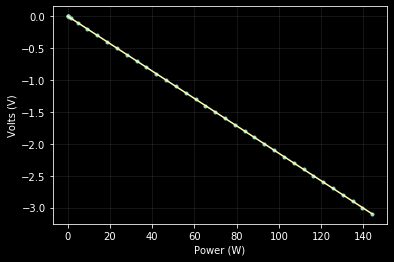

In [87]:
plt.plot(powers, volts,'.')
plt.grid(alpha=0.1)
plt.plot(xpts,ypts)
plt.ylabel('Volts (V)')
plt.xlabel('Power (W)');

## February 17th 2020

Today I decided to take a look at the tweezer power through the system since I had noticed that it seemed to be struggling earlier. it seems like most of the issue is coming from the Ti-Saph.   
init:  
95 mw max tweezer  
~0.23W out of dm pbs  
0.36 after intensity aom telescope  
0.54W out of Ti-Saph! sadness.  
tweak ti-saph -> 0.68 out, still pretty bad  
after realignment (only small tweaks) get 130mW single tweezer in big tele

